In [11]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()

def load_special_edu_support_percentage():
    melted_df = loader.load('students_with_special_educational_support_no_gender')

    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    total_over_years = melted_df.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'Students': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df

def load_repeaters_percentage():
    df_melted = loader.load('number_of_repeaters')

    df_melted = df_melted[df_melted['school']!="Special schools"] #Drop special schools because they have special effects
    
    df_melted['year'] = pd.to_datetime(df_melted['year'], format='%Y')
    df_melted['total'] = pd.to_numeric(df_melted['total'], errors='coerce')
    total_students_by_year = df_melted.groupby(['year', 'school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'Students': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()

    merged_df = pd.merge(total_students_by_year, child_amount_per_year, on=['year','school'])
    merged_df['repeaters_relative'] = merged_df['total']/merged_df['Value'] 


    return merged_df

repeaters = load_repeaters_percentage()
special_edu_support = load_special_edu_support_percentage()

repeaters


total      Value  \
year       school                                                               
1998-01-01 Free Waldorf Schools                                0.0   123402.0   
           Grammar schools (8 years of schooling)              0.0        0.0   
           Grammar schools (9 years of schooling)         730996.0  4446796.0   
           Integrated comprehensive schools                    0.0  1087596.0   
           Intermediate schools                           705708.0  2495270.0   
...                                                            ...        ...   
2022-01-01 Intermediate schools                           267254.0  1537743.0   
           Orientation stages independent of school type    7697.0   233376.0   
           Primary schools                                153022.0  4481001.0   
           Schools with various courses of education      289830.0  1090645.0   
           Secondary general schools                      114588.0   666473.0   

                                                          repeaters_relative  
year       school                                                             
1998-01-01 Free Waldorf Schools                                     0.000000  
           Grammar schools (8 years of schooling)                        NaN  
           Grammar schools (9 years of schooling)                   0.164387  
           Integrated comprehensive schools                         0.000000  
           Intermediate schools                                     0.282818  
...                                                                      ...  
2022-01-01 Intermediate schools                                     0.173796  
           Orientation stages independent of school type            0.032981  
           Primary schools                                          0.034149  
           Schools with various courses of education                0.265742  
           Secondary general schools                                0.171932  

[225 rows x 3 columns]

In [ ]:
merged_df = pd.merge(repeaters, special_edu_support, on=['year','school'])
correlation_coefficient = merged_df['edu_support_relative'].corr(merged_df['repeaters_relative'])
correlation_coefficient

-0.05215319079259427

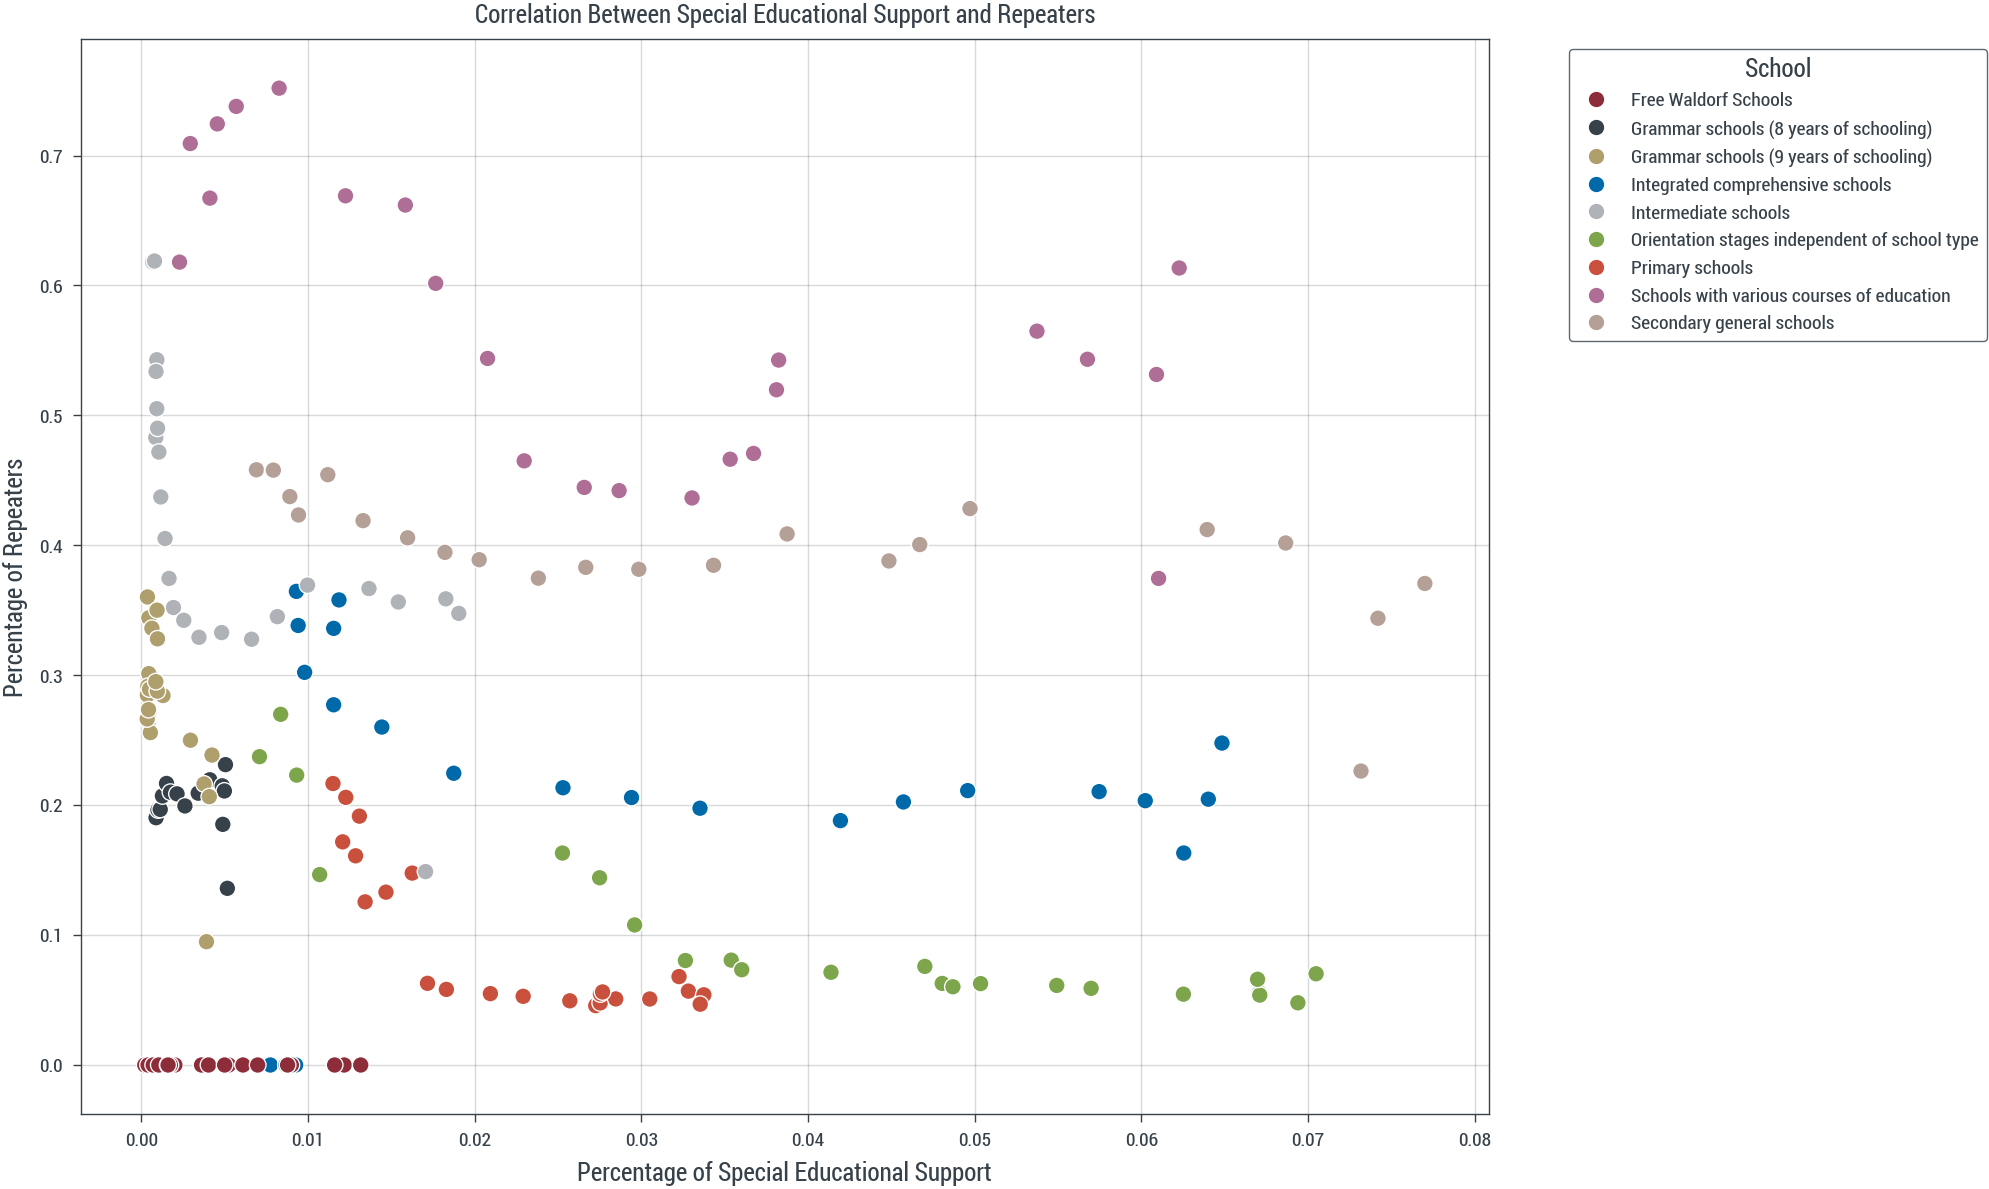

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='edu_support_relative', y='repeaters_relative', hue='school')
plt.title('Correlation Between Special Educational Support and Repeaters')
plt.xlabel('Percentage of Special Educational Support')
plt.ylabel('Percentage of Repeaters')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()